# Plot surface maps

Compare coupled model with ocean-only model and WOA13 observations.

In [21]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45333,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:37477,Total threads: 4
Dashboard: /proxy/44911/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:33917,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [45]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

### Load data

Model data

In [7]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [8]:
SST_CM2_025 = xr.open_dataarray(path_to_data + 'SST_global_annual.nc')
SST_CM2_025 = SST_CM2_025.sel(time=slice(start_time, end_time)).mean('time')

In [9]:
SST_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SST_CM2_1_annual.nc')
SST_CM2_1 = SST_CM2_1.sel(time=slice(start_time, end_time)).mean('time')

In [10]:
SST_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SST_OM2_025_annual.nc')
SST_OM2_025 = SST_OM2_025.sel(time=slice('2300-01-01', '2399-12-31')).mean('time')

In [55]:
SSS_CM2_025 = xr.open_dataarray(path_to_data + 'SSS_global_annual_400_499.nc')
SSS_CM2_025 = SSS_CM2_025.mean('time')

SSS_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SSS_CM2_1_annual_400_499.nc')
SSS_CM2_1 = SSS_CM2_1.mean('time')

SSS_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SSS_OM2_025_annual_2300_2399.nc')
SSS_OM2_025 = SSS_OM2_025.mean('time')

WOA13 observations

In [47]:
WOA13_025 = xr.open_mfdataset('/g/data/ik11/observations/woa13/025_KDS50/woa13_ts_??_mom025.nc')
WOA13_025 = WOA13_025.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_025['yt_ocean'] = SST_CM2_025.yt_ocean
WOA13_025 = WOA13_025.mean('time').sel(st_ocean=0, method='nearest')
WOA13_025_temp = WOA13_025.temp.load()
WOA13_025_salt = WOA13_025.salt.load()

In [48]:
WOA13_1 = xr.open_mfdataset('/g/data/ik11/observations/woa13/10_KDS50/woa13_ts_??_mom10.nc')
WOA13_1 = WOA13_1.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_1['yt_ocean'] = SST_CM2_1.yt_ocean
WOA13_1 = WOA13_1.mean('time').sel(st_ocean=0, method='nearest')
WOA13_1_temp = WOA13_1.temp.load()
WOA13_1_salt = WOA13_1.salt.load()

Calculate anomalies

In [13]:
temp_anom_CM2_025 = SST_CM2_025-WOA13_025_temp
temp_anom_CM2_025 = temp_anom_CM2_025.where(temp_anom_CM2_025>-100, np.nan)

temp_anom_OM2_025 = SST_OM2_025-WOA13_025_temp
temp_anom_OM2_025 = temp_anom_OM2_025.where(temp_anom_OM2_025>-100, np.nan)

temp_anom_CM2_1 = SST_CM2_1-WOA13_1_temp
temp_anom_CM2_1 = temp_anom_CM2_1.where(temp_anom_CM2_1>-100, np.nan)

In [101]:
salt_anom_CM2_025 = SSS_CM2_025-WOA13_025_salt
salt_anom_CM2_025 = salt_anom_CM2_025.where(SSS_CM2_025!=0, np.nan)

salt_anom_OM2_025 = SSS_OM2_025-WOA13_025_salt
#salt_anom_OM2_025 = salt_anom_OM2_025.where(salt_anom_OM2_025<10, np.nan)

salt_anom_CM2_1 = SSS_CM2_1-WOA13_1_salt
#salt_anom_CM2_1 = salt_anom_CM2_1.where(salt_anom_CM2_1<10, np.nan)

Coordinate information

In [119]:
geolon_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [120]:
geolon_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_t
geolat_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_t

In [121]:
temp_anom_CM2_025 = temp_anom_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
temp_anom_OM2_025 = temp_anom_OM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

temp_anom_CM2_1   = temp_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

In [122]:
salt_anom_CM2_025 = salt_anom_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
salt_anom_OM2_025 = salt_anom_OM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

salt_anom_CM2_1   = salt_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

### Plotting

In [14]:
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

Temperature

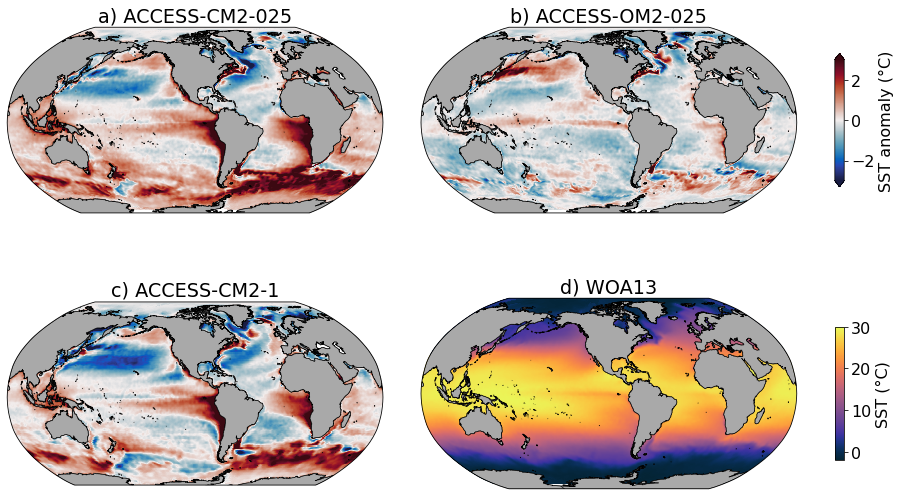

In [128]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = temp_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST anomaly (°C)', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_temp.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap=cm.cm.thermal, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST (°C)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_SST_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Salinity

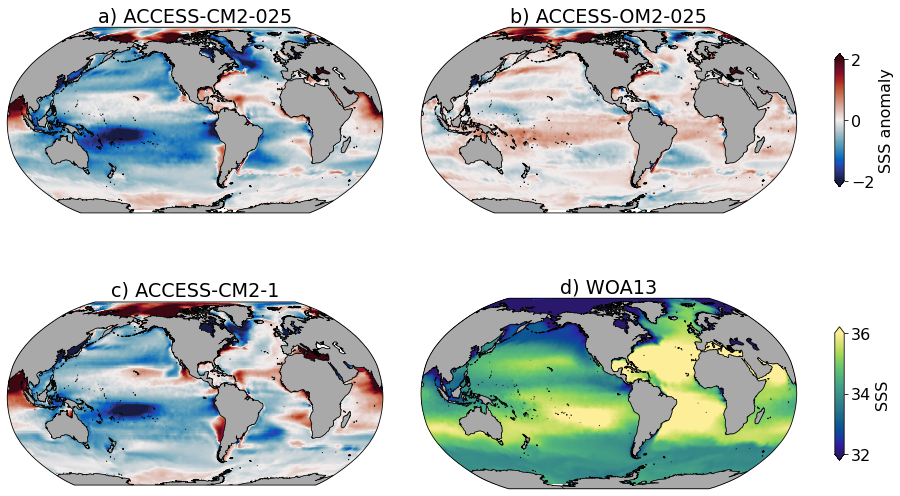

In [129]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = salt_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS anomaly', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_salt.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=32, vmax=36, cmap=cm.cm.haline, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS', extend='both')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_SSS_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);